In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

def load_csv(file_paths):
    if not isinstance(file_paths, list):
        file_paths = [file_paths]  # Convert single path to list with single element
    
    try:
        dfs = []  # List to store DataFrames from each CSV
        for path in file_paths:
            df = pd.read_csv(path)
            dfs.append(df)
        
        combined_df = pd.concat(dfs, ignore_index=True)  # Combine all DataFrames into one
        
        return combined_df
    except FileNotFoundError:
        print("File not found.")
        return None
    except Exception as e:
        print("An error occurred:", e)
        return None

    
def plot_histogram(data, column, map_axis = None):
    try:
        # Assuming the second column is named 'Value'
        if map_axis:
            data.iloc[:, column] = data.iloc[:, column].map(map_axis)
            data.iloc[:, column] = data.iloc[:, column].astype(str)
            print(data.head())
            unique_values = data.iloc[:, column].unique()
        else:
            unique_values = data.iloc[:, column].unique() 
        

        counts, bins, _ = plt.hist(data.iloc[:, column], bins=len(unique_values))
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title('Histogram of Labels')
        plt.show()

        # Print histogram values
        print("Histogram Values:")
        sum = 0
        for i in range(len(counts)):
            print(f"Bin {unique_values[i]}: {int(counts[i])}")
            sum += int(counts[i])
        print(f"Total: {sum}")
    except Exception as e:
        print("An error occurred while plotting the histogram:", e)



Data loaded successfully!
                                                text label
0  You must be knowing #blithe means (adj.)  Happ...   joy
1  Old saying 'A #smile shared is one gained for ...   joy
2  Bridget Jones' Baby was bloody hilarious 😅 #Br...   joy
3  @Elaminova sparkling water makes your life spa...   joy
4  I'm tired of everybody telling me to chill out...   joy


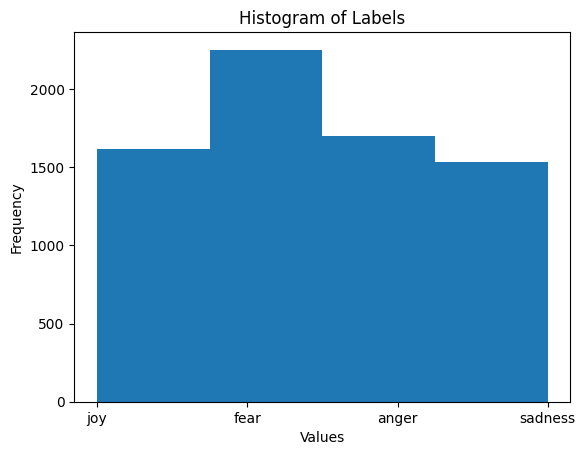

Histogram Values:
Bin joy: 1616
Bin fear: 2252
Bin anger: 1701
Bin sadness: 1533
Total: 7102
                                                Text Label  \
0  You must be knowing #blithe means (adj.)  Happ...     0   
1  Old saying 'A #smile shared is one gained for ...     0   
2  Bridget Jones' Baby was bloody hilarious 😅 #Br...     0   
3  @Elaminova sparkling water makes your life spa...     0   
4  I'm tired of everybody telling me to chill out...     0   

                      dataset  
0  emotion-classification-nlp  
1  emotion-classification-nlp  
2  emotion-classification-nlp  
3  emotion-classification-nlp  
4  emotion-classification-nlp  


In [224]:
file_path = [
    "/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv", 
    "/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv",
    "/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv"
] 

emotion_classification_nlp_map = {
    "joy": 0,
    "fear": 1,
    "anger": 2,
    "sadness": 3
}

emotion_classification_nlp = load_csv(file_path)
if emotion_classification_nlp is not None:
    print("Data loaded successfully!")
    print(emotion_classification_nlp.head())

plot_histogram(emotion_classification_nlp, 1)

emotion_classification_nlp.iloc[:, 1] = emotion_classification_nlp.iloc[:, 1].map(emotion_classification_nlp_map)
emotion_classification_nlp["dataset"] = "emotion-classification-nlp"

emotion_classification_nlp.rename(columns={emotion_classification_nlp.columns[0]: 'Text'}, inplace=True)
emotion_classification_nlp.rename(columns={emotion_classification_nlp.columns[1]: 'Label'}, inplace=True)


print(emotion_classification_nlp.head())

Data loaded successfully!
                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


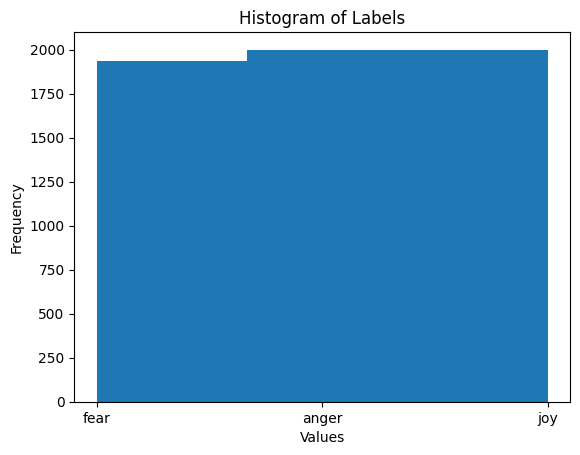

Histogram Values:
Bin fear: 1937
Bin anger: 2000
Bin joy: 2000
Total: 5937
                                                Text Label          dataset
0  i seriously hate one subject to death but now ...     1  emotion-dataset
1                 im so full of life i feel appalled     2  emotion-dataset
2  i sit here to write i start to dig out my feel...     1  emotion-dataset
3  ive been really angry with r and i feel like a...     0  emotion-dataset
4  i feel suspicious if there is no one outside l...     1  emotion-dataset


In [225]:
file_path = "/kaggle/input/emotion-dataset/Emotion_classify_Data.csv" 

emotion_dataset_map = {
    "joy": 0,
    "fear": 1,
    "anger": 2,
}

emotion_dataset = load_csv(file_path)
if emotion_dataset is not None:
    print("Data loaded successfully!")
    print(emotion_dataset.head())
    
plot_histogram(emotion_dataset, 1)

emotion_dataset.iloc[:, 1] = emotion_dataset.iloc[:, 1].map(emotion_dataset_map)
emotion_dataset["dataset"] = "emotion-dataset"

emotion_dataset.rename(columns={emotion_dataset.columns[0]: 'Text'}, inplace=True)
emotion_dataset.rename(columns={emotion_dataset.columns[1]: 'Label'}, inplace=True)


print(emotion_dataset.head())

Data loaded successfully!
     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


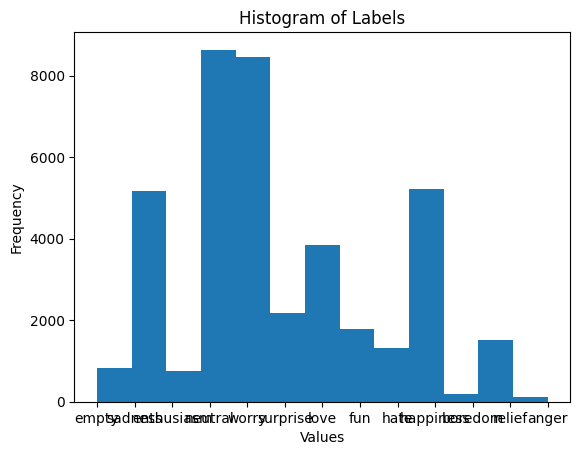

Histogram Values:
Bin empty: 827
Bin sadness: 5165
Bin enthusiasm: 759
Bin neutral: 8638
Bin worry: 8459
Bin surprise: 2187
Bin love: 3842
Bin fun: 1776
Bin hate: 1323
Bin happiness: 5209
Bin boredom: 179
Bin relief: 1526
Bin anger: 110
Total: 40000
                                                Text Label          dataset
0  i seriously hate one subject to death but now ...     1  emotion-dataset
1                 im so full of life i feel appalled     2  emotion-dataset
2  i sit here to write i start to dig out my feel...     1  emotion-dataset
3  ive been really angry with r and i feel like a...     0  emotion-dataset
4  i feel suspicious if there is no one outside l...     1  emotion-dataset


In [226]:
file_path = "/kaggle/input/emotion-detection-from-text/tweet_emotions.csv" 

emotion_detection_from_text_map = {
    "anger": 2,
    "sadness": 3,
    "empty": 4,
    "enthusiasm": 5,
    "worry": 6,
    "surprise": 7,
    "love": 8,
    "fun": 9,
    "hate": 10,
    "happiness": 11,
    "boredom": 12,
    "relief": 13,
}


emotion_detection_from_text = load_csv(file_path)
if emotion_detection_from_text is not None:
    print("Data loaded successfully!")
    print(emotion_detection_from_text.head())
    
plot_histogram(emotion_detection_from_text, 1)

# Drop first column
emotion_detection_from_text.drop(emotion_detection_from_text.columns[0], axis=1, inplace=True)
# Permute column 0 and 1
temp_col = emotion_detection_from_text.iloc[:, 0].copy()
emotion_detection_from_text.iloc[:, 0] = emotion_detection_from_text.iloc[:, 1]
emotion_detection_from_text.iloc[:, 1] = temp_col
# Map labels
emotion_detection_from_text.iloc[:, 1] = emotion_detection_from_text.iloc[:, 1].map(emotion_detection_from_text_map)
# Add dataset info
emotion_detection_from_text["dataset"] = "eemotion-detection-from-text"

emotion_detection_from_text.rename(columns={emotion_detection_from_text.columns[0]: 'Text'}, inplace=True)
emotion_detection_from_text.rename(columns={emotion_detection_from_text.columns[1]: 'Label'}, inplace=True)


print(emotion_dataset.head())

Data loaded successfully!
   Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4
   Unnamed: 0                                               text    label
0           0      i just feel really helpless and heavy hearted     fear
1           1  ive enjoyed being able to slouch about relax a...  sadness
2           2  i gave up my internship with the dmrg and am f...     fear
3           3                         i dont know i feel so lost  sadness
4           4  i am a kindergarten teacher and i am thoroughl...     fear


/tmp/ipykernel_33/2095901883.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0             fear
1          sadness
2             fear
3          sadness
4             fear
            ...   
416804        love
416805       anger
416806    surprise
416807       anger
416808    surprise
Name: label, Length: 416809, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, column] = data.iloc[:, column].map(map_axis)


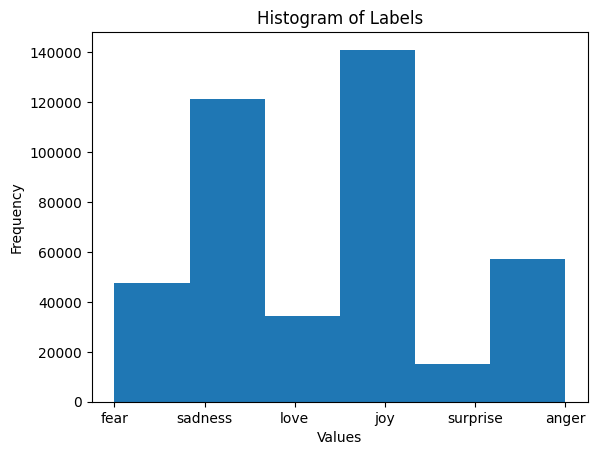

Histogram Values:
Bin fear: 47712
Bin sadness: 121187
Bin love: 34554
Bin joy: 141067
Bin surprise: 14972
Bin anger: 57317
Total: 416809
                                                Text Label   dataset
0      i just feel really helpless and heavy hearted     1  emotions
1  ive enjoyed being able to slouch about relax a...     3  emotions
2  i gave up my internship with the dmrg and am f...     1  emotions
3                         i dont know i feel so lost     3  emotions
4  i am a kindergarten teacher and i am thoroughl...     1  emotions


In [227]:
file_path = "/kaggle/input/emotions/text.csv" 

emotions_map = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}


emotions = load_csv(file_path)
if emotions is not None:
    print("Data loaded successfully!")
    print(emotions.head())
    
plot_histogram(emotions, 2, emotions_map)


# Drop first column
emotions.drop(emotions.columns[0], axis=1, inplace=True)

emotions_map = {
    "joy": 0,
    "fear": 1,
    "anger": 2,
    "sadness": 3,
    "surprise": 7,
    "love": 8,
}

# Map labels
emotions.iloc[:, 1] = emotions.iloc[:, 1].map(emotions_map)
# Add dataset info
emotions["dataset"] = "emotions"

emotions.rename(columns={emotions.columns[0]: 'Text'}, inplace=True)
emotions.rename(columns={emotions.columns[1]: 'Label'}, inplace=True)


print(emotions.head())

Data loaded successfully!
                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


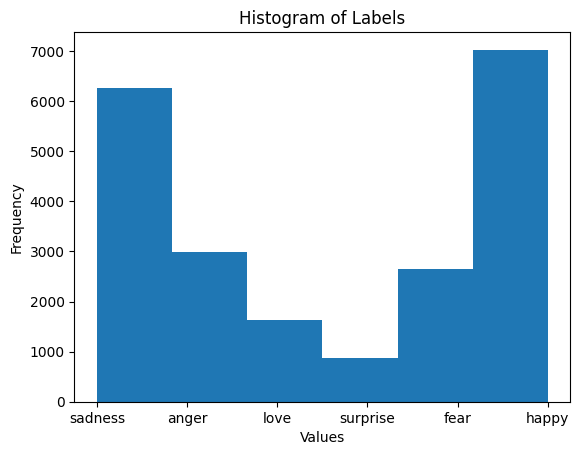

Histogram Values:
Bin sadness: 6265
Bin anger: 2993
Bin love: 1641
Bin surprise: 879
Bin fear: 2652
Bin happy: 7029
Total: 21459
                                                Text Label           dataset
0                            i didnt feel humiliated     3  emotions-in-text
1  i can go from feeling so hopeless to so damned...     3  emotions-in-text
2   im grabbing a minute to post i feel greedy wrong     2  emotions-in-text
3  i am ever feeling nostalgic about the fireplac...     8  emotions-in-text
4                               i am feeling grouchy     2  emotions-in-text


In [228]:
file_path = "/kaggle/input/emotions-in-text/Emotion_final.csv" 

emotions_in_text_map = {
    "fear": 1,
    "anger": 2,
    "sadness": 3,
    "surprise": 7,
    "love": 8,
    "happy": 11,
}

emotions_in_text = load_csv(file_path)
if emotions_in_text is not None:
    print("Data loaded successfully!")
    print(emotions_in_text.head())
    
plot_histogram(emotions_in_text, 1)

# Map labels
emotions_in_text.iloc[:, 1] = emotions_in_text.iloc[:, 1].map(emotions_in_text_map)
# Add dataset info
emotions_in_text["dataset"] = "emotions-in-text"

emotions_in_text.rename(columns={emotions_in_text.columns[0]: 'Text'}, inplace=True)
emotions_in_text.rename(columns={emotions_in_text.columns[1]: 'Label'}, inplace=True)


print(emotions_in_text.head())

Data loaded successfully!
   Unnamed: 0                   Datetime             Tweet Id  \
0           0  2022-09-30 23:29:15+00:00  1575991191170342912   
1           1  2022-09-30 21:46:35+00:00  1575965354425131008   
2           2  2022-09-30 21:18:02+00:00  1575958171423752203   
3           3  2022-09-30 20:05:24+00:00  1575939891485032450   
4           4  2022-09-30 20:03:17+00:00  1575939359160750080   

                                                Text        Username  \
0  @Logitech @apple @Google @Microsoft @Dell @Len...  ManjuSreedaran   
1  @MK_habit_addict @official_stier @MortalKombat...      MiKeMcDnet   
2  As @CRN celebrates its 40th anniversary, Bob F...        jfollett   
3  @dell your customer service is horrible especi...       daveccarr   
4  @zacokalo @Dell @DellCares @Dell give the man ...      heycamella   

  sentiment  sentiment_score       emotion  emotion_score  
0   neutral         0.853283  anticipation       0.587121  
1   neutral         0.519470  

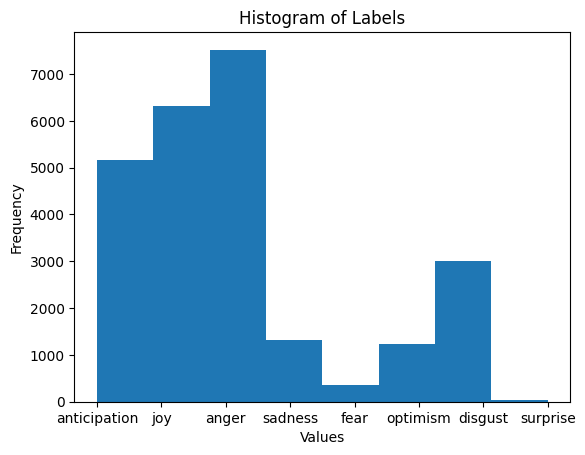

Histogram Values:
Bin anticipation: 5171
Bin joy: 6326
Bin anger: 7520
Bin sadness: 1328
Bin fear: 366
Bin optimism: 1225
Bin disgust: 3000
Bin surprise: 34
Total: 24970
                                                Text Label  \
0  @Logitech @apple @Google @Microsoft @Dell @Len...    14   
1  @MK_habit_addict @official_stier @MortalKombat...     0   
2  As @CRN celebrates its 40th anniversary, Bob F...     0   
3  @dell your customer service is horrible especi...     2   
4  @zacokalo @Dell @DellCares @Dell give the man ...     2   

                            dataset  
0  sentiment-and-emotions-of-tweets  
1  sentiment-and-emotions-of-tweets  
2  sentiment-and-emotions-of-tweets  
3  sentiment-and-emotions-of-tweets  
4  sentiment-and-emotions-of-tweets  


In [229]:
file_path = "/kaggle/input/sentiment-and-emotions-of-tweets/sentiment-emotion-labelled_Dell_tweets.csv" 
sentiment_and_emotions_of_tweets_map = {
    "joy": 0,
    "fear": 1,
    "anger": 2,
    "sadness": 3,
    "surprise": 7,
    "anticipation": 14,
    "optimism": 15,
    "disgust": 16,
}


sentiment_and_emotions_of_tweets = load_csv(file_path)
if sentiment_and_emotions_of_tweets is not None:
    print("Data loaded successfully!")
    print(sentiment_and_emotions_of_tweets.head())
    
plot_histogram(sentiment_and_emotions_of_tweets, 7)

# Drop columns
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[0], axis=1, inplace=True)
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[0], axis=1, inplace=True)
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[0], axis=1, inplace=True)
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[1], axis=1, inplace=True)
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[1], axis=1, inplace=True)
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[1], axis=1, inplace=True)
sentiment_and_emotions_of_tweets.drop(sentiment_and_emotions_of_tweets.columns[2], axis=1, inplace=True)
# Map labels
sentiment_and_emotions_of_tweets.iloc[:, 1] = sentiment_and_emotions_of_tweets.iloc[:, 1].map(sentiment_and_emotions_of_tweets_map)
# Add dataset info
sentiment_and_emotions_of_tweets["dataset"] = "sentiment-and-emotions-of-tweets"

sentiment_and_emotions_of_tweets.rename(columns={sentiment_and_emotions_of_tweets.columns[0]: 'Text'}, inplace=True)
sentiment_and_emotions_of_tweets.rename(columns={sentiment_and_emotions_of_tweets.columns[1]: 'Label'}, inplace=True)

print(sentiment_and_emotions_of_tweets.head())

Data loaded successfully!
        id                                               text  \
0  eew5j0j                                    That game hurt.   
2  ed2mah1     You do right, if you don't care then fuck 'em!   
3  eeibobj                                 Man I love reddit.   
4  eda6yn6  [NAME] was nowhere near them, he was by the Fa...   
5  eespn2i  Right? Considering it’s such an important docu...   

   example_very_unclear    emotion  
0                 False    sadness  
2                 False    neutral  
3                 False       love  
4                 False    neutral  
5                 False  gratitude  


/tmp/ipykernel_33/103998121.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['emotion'] = relevant_columns.idxmax(axis=1)


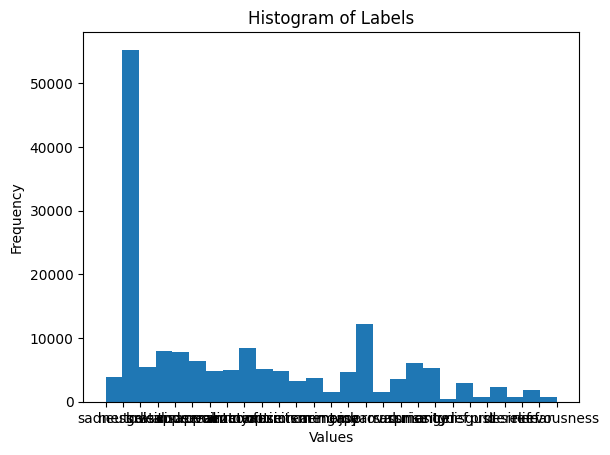

Histogram Values:
Bin sadness: 3901
Bin neutral: 55298
Bin love: 5474
Bin gratitude: 7924
Bin disapproval: 7797
Bin amusement: 6408
Bin disappointment: 4820
Bin realization: 4921
Bin annoyance: 8456
Bin confusion: 5063
Bin optimism: 4874
Bin excitement: 3290
Bin caring: 3657
Bin remorse: 1528
Bin joy: 4742
Bin approval: 12252
Bin embarrassment: 1454
Bin surprise: 3630
Bin curiosity: 6089
Bin anger: 5243
Bin grief: 359
Bin disgust: 2975
Bin pride: 802
Bin desire: 2266
Bin relief: 813
Bin fear: 1812
Bin nervousness: 812
Total: 166660
                                                Text Label  \
0                                    That game hurt.   3.0   
2     You do right, if you don't care then fuck 'em!   4.0   
3                                 Man I love reddit.   8.0   
4  [NAME] was nowhere near them, he was by the Fa...   4.0   
5  Right? Considering it’s such an important docu...  17.0   

                               dataset  
0  go-emotions-google-emotions-dataset  
2  go-e

In [230]:
import pandas as pd
from tqdm import tqdm

file_path = "/kaggle/input/go-emotions-google-emotions-dataset/go_emotions_dataset.csv" 

go_emotions_google_emotions_dataset_map = {
    "joy": 0,
    "fear": 1,
    "anger": 2,
    "sadness": 3,
    "neutral": 4,
    "exitement": 5,
    "worry": 6,
    "surprise": 7,
    "love": 8,
    "fun": 9,
    "hate": 10,
    "happiness": 11,
    "boredom": 12,
    "relief": 13,
    "anticipation": 14,
    "optimism": 15,
    "disgust": 16,
    "gratitude": 17,
    "disapproval": 18,
    "amusement": 19,
    "disapointment": 20,
    "realization": 21,
    "annoyance": 22,
    "confusion": 23,
    "caring": 24,
    "remorse": 25,
    "approval": 26,
    "embarrassment": 27,
    "curiosity": 28,
    "grief": 29,
    "pride": 30,
    "desire": 31,
    "nervousness": 32
}

def check_one_value_of_1(df):
    # Slice the relevant columns
    relevant_columns = df.iloc[:, 4:32]
    unclear = df.iloc[:, 3]
    
    # Count the number of 1s in each row
    row_counts = relevant_columns.sum(axis=1)
    
    # Find rows with exactly one 1
    one_value_rows = row_counts == 1
    
    # Filter the DataFrame to keep only rows with exactly one 1
    df_filtered = df[one_value_rows]
    
    unclear_rows = unclear == True
    
#     df_filtered = df_filtered[unclear_rows]
    
    # Find the column with value 1 for each row
    df_filtered['emotion'] = relevant_columns.idxmax(axis=1)
    
    return df_filtered.iloc[:, list(range(3)) + [-1]]

# Load the CSV file into a DataFrame
go_emotions_google_emotions_dataset = pd.read_csv(file_path)

if go_emotions_google_emotions_dataset is not None:
    print("Data loaded successfully!")
    # Apply the check_one_value_of_1 function
    go_emotions_google_emotions_dataset = check_one_value_of_1(go_emotions_google_emotions_dataset)
    print(go_emotions_google_emotions_dataset.head())
    
plot_histogram(go_emotions_google_emotions_dataset, 3)


# Drop columns
go_emotions_google_emotions_dataset.drop(go_emotions_google_emotions_dataset.columns[0], axis=1, inplace=True)
go_emotions_google_emotions_dataset.drop(go_emotions_google_emotions_dataset.columns[1], axis=1, inplace=True)

# Map labels
go_emotions_google_emotions_dataset.iloc[:, 1] = go_emotions_google_emotions_dataset.iloc[:, 1].map(go_emotions_google_emotions_dataset_map)
# Add dataset info
go_emotions_google_emotions_dataset["dataset"] = "go-emotions-google-emotions-dataset"

go_emotions_google_emotions_dataset.rename(columns={go_emotions_google_emotions_dataset.columns[0]: 'Text'}, inplace=True)
go_emotions_google_emotions_dataset.rename(columns={go_emotions_google_emotions_dataset.columns[1]: 'Label'}, inplace=True)

print(go_emotions_google_emotions_dataset.head())

                                                Text Label  \
0  You must be knowing #blithe means (adj.)  Happ...     0   
1  Old saying 'A #smile shared is one gained for ...     0   
2  Bridget Jones' Baby was bloody hilarious 😅 #Br...     0   
3  @Elaminova sparkling water makes your life spa...     0   
4  I'm tired of everybody telling me to chill out...     0   

                      dataset  
0  emotion-classification-nlp  
1  emotion-classification-nlp  
2  emotion-classification-nlp  
3  emotion-classification-nlp  
4  emotion-classification-nlp  


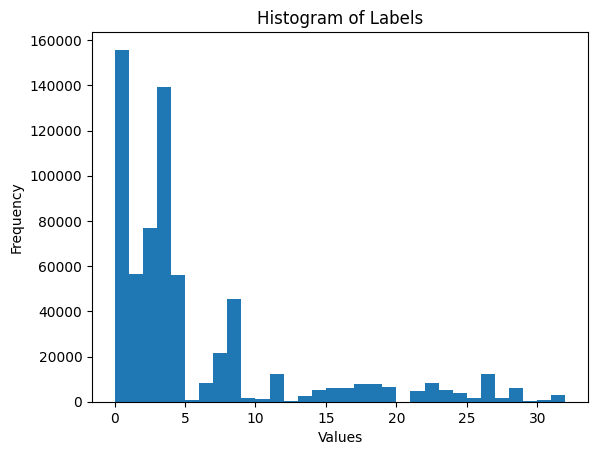

Histogram Values:
Bin 0: 155751
Bin 1: 56731
Bin 2: 76884
Bin 3: 139379
Bin 4: 56125
Bin 5: 759
Bin 6: 8459
Bin 7: 21702
Bin 8: 45511
Bin 9: 1776
Bin 10: 1323
Bin 11: 12238
Bin 12: 179
Bin 13: 2339
Bin 17: 5171
Bin 18: 6099
Bin 19: 5975
Bin 21: 7924
Bin 22: 7797
Bin 23: 6408
Bin 15: 0
Bin 24: 4921
Bin 25: 8456
Bin 26: 5063
Bin 27: 3657
Bin 28: 1528
Bin 29: 12252
Bin 16: 1454
Bin 30: 6089
Bin 31: 359
Bin 32: 802
Bin 14: 3078
Total: 666189


/tmp/ipykernel_33/2299034957.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df2['Label'].replace({8: 5}, inplace=True)
/tmp/ipykernel_33/2299034957.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_df2['Label'].replace({8: 5}, inplace=True)
/tmp/ipykernel_33/2299034957.py:

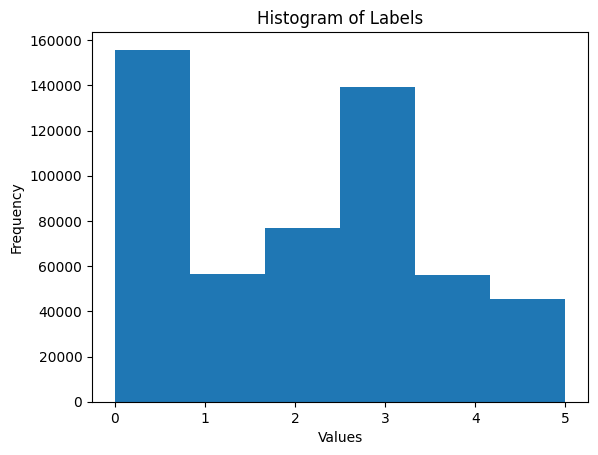

Histogram Values:
Bin 0: 155751
Bin 1: 56731
Bin 2: 76884
Bin 3: 139379
Bin 4: 56125
Bin 5: 45511
Total: 530381
                                                Text Label  \
0  You must be knowing #blithe means (adj.)  Happ...     0   
1  Old saying 'A #smile shared is one gained for ...     0   
2  Bridget Jones' Baby was bloody hilarious 😅 #Br...     0   
3  @Elaminova sparkling water makes your life spa...     0   
4  I'm tired of everybody telling me to chill out...     0   

                      dataset  
0  emotion-classification-nlp  
1  emotion-classification-nlp  
2  emotion-classification-nlp  
3  emotion-classification-nlp  
4  emotion-classification-nlp  


In [263]:
combined_df = pd.concat([emotion_classification_nlp, emotion_dataset, emotion_detection_from_text, emotions, emotions_in_text, go_emotions_google_emotions_dataset, sentiment_and_emotions_of_tweets], ignore_index=True)

print(combined_df.head())

# Drop rows with NaN values
combined_df.dropna(subset=[combined_df.columns[1]], inplace=True)

# Convert the second column to integers
combined_df.iloc[:, 1] = combined_df.iloc[:, 1].astype(int)


plot_histogram(combined_df, 1)

# Assuming you want to keep only rows where the values in the second column are in [0, 1, 2, 3, 4, 8]
labels_to_keep = [0, 1, 2, 3, 4]
filtered_df1 = combined_df[combined_df.iloc[:, 1].isin(labels_to_keep)]
filtered_df2 = combined_df[combined_df.iloc[:, 1].isin([8])]
# Rename label '8' to '5' in the filtered DataFrame
filtered_df2['Label'].replace({8: 5}, inplace=True)
combined_df = pd.concat([filtered_df1, filtered_df2], ignore_index=True)
plot_histogram(combined_df, 1)

print(combined_df.head())

In [264]:
label_counts = combined_df['Label'].value_counts()

# Display the statistics
print(label_counts)
# 0: joy
# 1: fear
# 2: anger
# 3: sadness
# 4: neutral
# 5: love

Label
0    155751
3    139379
2     76884
1     56731
4     56125
5     45511
Name: count, dtype: int64


In [266]:
# Remove duplicates based on the first column
combined_df.drop_duplicates(subset=[combined_df.columns[0]], inplace=True)


# Check for duplicates in the first column
duplicates = combined_df.duplicated(combined_df.columns[0])

# Count the number of duplicates in the first column
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)


Number of duplicates: 0


In [267]:
label_counts = combined_df['Label'].value_counts()

# Display the statistics
print(label_counts)
# 0: joy
# 1: fear
# 2: anger
# 3: sadness
# 4: neutral
# 5: love

Label
0    151470
3    128956
2     67199
1     49324
5     30079
4     29834
Name: count, dtype: int64


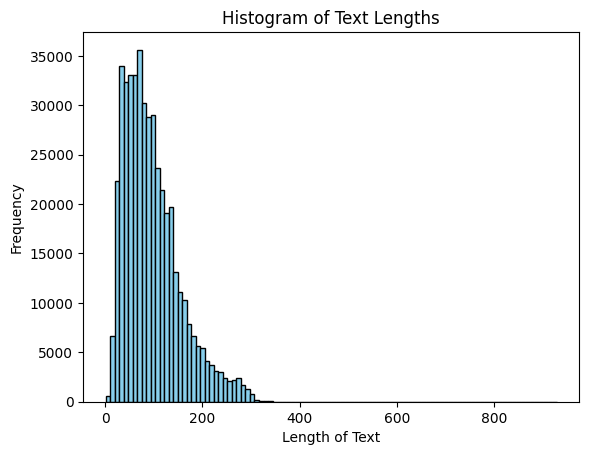

In [270]:
import matplotlib.pyplot as plt

# Compute the length of the text from the first column
text_lengths = combined_df.iloc[:, 0].str.len()

# Plot a histogram of the text lengths
plt.hist(text_lengths, bins=100, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')

# Show the plot
plt.show()


In [271]:
# Filter out rows where the length of text in the first column is longer than 400
combined_df = combined_df[combined_df.iloc[:, 0].str.len() <= 400]


In [272]:
label_counts = combined_df['Label'].value_counts()

# Display the statistics
print(label_counts)
# 0: joy
# 1: fear
# 2: anger
# 3: sadness
# 4: neutral
# 5: love

Label
0    151456
3    128951
2     67180
1     49322
5     30079
4     29832
Name: count, dtype: int64


In [273]:
# Save the DataFrame to a CSV file
combined_df.to_csv('combined_df.csv', index=False)


{
    "joy": 0,
    "fear": 1,
    "anger": 2,
    "sadness": 3,
    "neutral": 4,
    "enthusiasm": 5,
    "worry": 6,
    "surprise": 7,
    "love": 8,
    "fun": 9,
    "hate": 10,
    "happiness": 11,
    "boredom": 12,
    "relief": 13,
    "anticipation": 14,
    "optimism": 15,
    "disgust": 16,
    "gratitude": 17,
    "disapproval": 18,
    "amusement": 19,
    "disapointment": 20,
    "realization": 21,
    "annoyance": 22,
    "confusion": 23,
    "caring": 24,
    "remorse": 25,
    "approval": 26,
    "embarrassment": 27,
    "curiosity": 28,
    "grief": 29,
    "pride": 30,
    "desire": 31,
    "nervousness": 32
}
